In [1]:
import pandas as pd

df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="cp1252")


In [2]:
df.columns = df.columns.str.strip()


In [3]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teacher’s approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [5]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course'],
      dtype='object')

In [6]:
df[['Average Score', 'Percentage']] = df['Average/ Percentage'].str.split('/', expand=True)

df['Average Score'] = df['Average Score'].astype(float)
df['Percentage'] = df['Percentage'].astype(float)


In [7]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course',
       'Average Score', 'Percentage'],
      dtype='object')

In [8]:
df.isnull().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
Average Score           0
Percentage              0
dtype: int64

In [9]:
def satisfaction_level(score):
    if score >= 4:
        return "High Satisfaction"
    elif score >= 3:
        return "Medium Satisfaction"
    else:
        return "Low Satisfaction"

df['Satisfaction Level'] = df['Average Score'].apply(satisfaction_level)


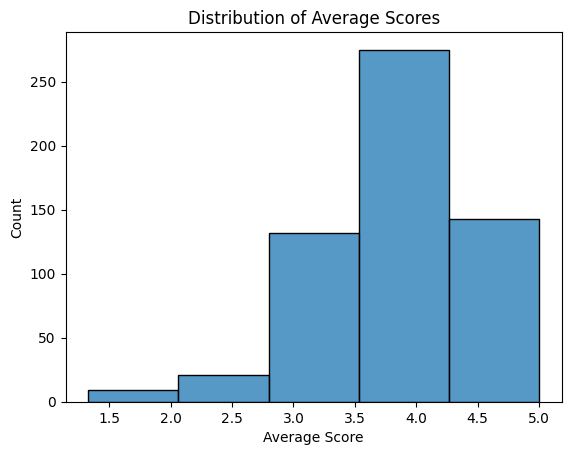

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Average Score'], bins=5)
plt.title("Distribution of Average Scores")
plt.show()


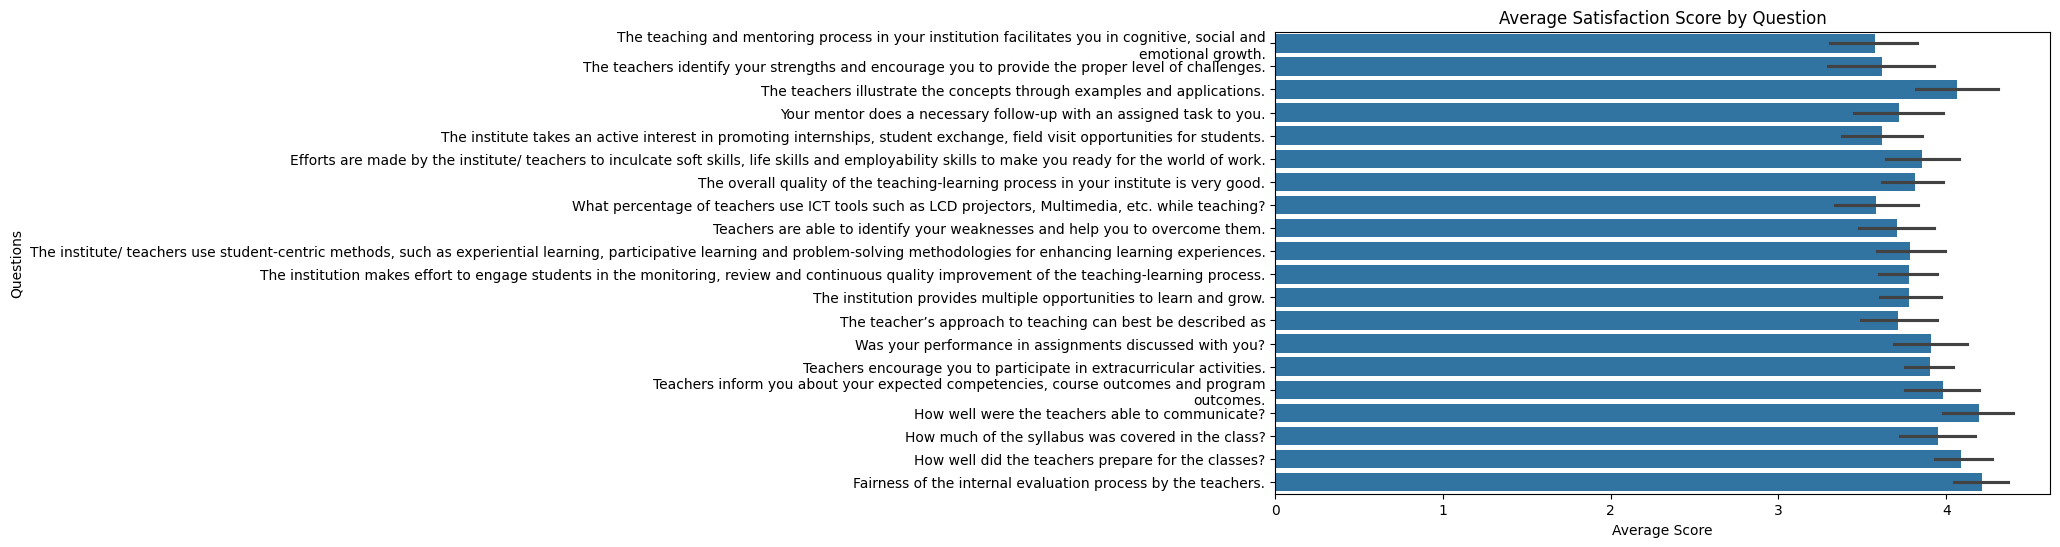

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Average Score',
    y='Questions',
    data=df.sort_values('Average Score')
)
plt.title("Average Satisfaction Score by Question")
plt.show()


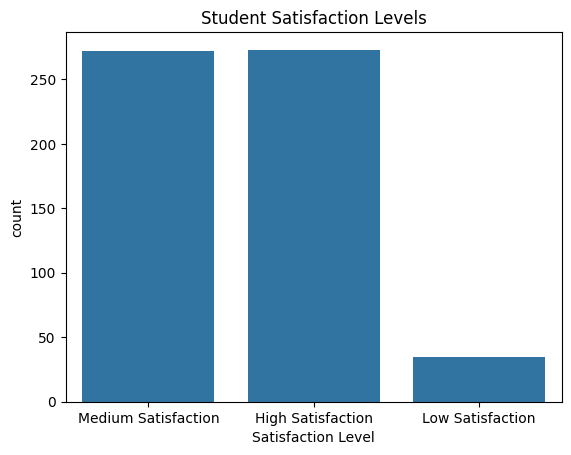

In [12]:
sns.countplot(x='Satisfaction Level', data=df)
plt.title("Student Satisfaction Levels")
plt.show()


In [16]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.6 MB/s  0:00:00


In [17]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment Score'] = df['Questions'].apply(get_sentiment)

In [18]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Sentiment Score'].apply(sentiment_label)

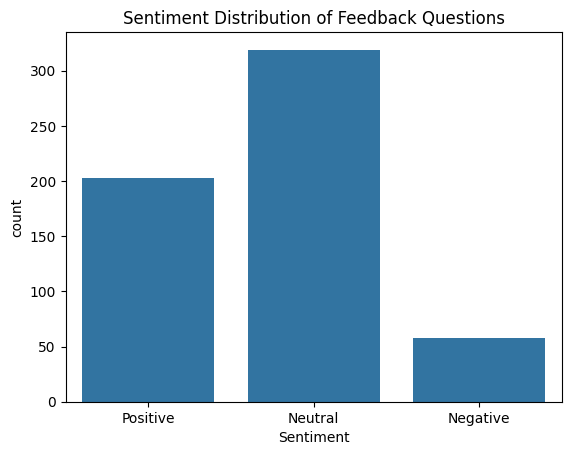

In [19]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution of Feedback Questions")
plt.show()

In [25]:
df['Action Required'] = df.apply(
    lambda x: "Yes" if x['Average Score'] < 3 and x['Sentiment'] == 'Negative' else "No",
    axis=1
)

In [26]:
df.to_csv("Student_Feedback_Cleaned.csv", index=False)